Proyek Analisis Data: rockpaperscissors

*   Nama : Fauzi Ramadhan
*   Email : fauzir008@gmail.com
*   Id Dicoding : fauzi_ramadhan_ujcf







Import Library

In [35]:
# Import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

Mengunduh Dataset

In [36]:
# Memasukkan Datasets ke Google Colab
from google.colab import drive
drive.mount('/content/drive')

# Path ke gambar di Google Drive
image_path = '/content/drive/My Drive/Colab Notebooks/rockpaperscissors'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Persiapan Data

In [38]:
# Persiapan Data
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.4
)

# Membuat objek generator untuk training set
train_generator = datagen.flow_from_directory(
    image_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Membuat objek generator untuk validation set
validation_generator = datagen.flow_from_directory(
    image_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Membangun Model Sequential

In [39]:
# Import Dropout layer
from tensorflow.keras.layers import Dropout

# Model Sequential
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))  # Tambahkan Dropout di sini
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Dengan asumsi Anda memiliki 3 kelas (batu, kertas, gunting)


Kompilasi dan Melatih Model

In [41]:
# Contoh penyesuaian hyperparameter kompilasi model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# melatih model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,  # Sesuaikan jumlah epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/5
41/41 [==============================] - 93s 2s/step - loss: 0.2933 - accuracy: 0.8885 - val_loss: 0.1920 - val_accuracy: 0.9306
Epoch 2/5
41/41 [==============================] - 92s 2s/step - loss: 0.2536 - accuracy: 0.9080 - val_loss: 0.2284 - val_accuracy: 0.9259
Epoch 3/5
41/41 [==============================] - 112s 3s/step - loss: 0.1823 - accuracy: 0.9290 - val_loss: 0.1816 - val_accuracy: 0.9421
Epoch 4/5
41/41 [==============================] - 92s 2s/step - loss: 0.1800 - accuracy: 0.9384 - val_loss: 0.1183 - val_accuracy: 0.9653
Epoch 5/5
41/41 [==============================] - 91s 2s/step - loss: 0.1232 - accuracy: 0.9587 - val_loss: 0.1331 - val_accuracy: 0.9606


Evaluasi Model dan Visualisasi

Validation Loss: 0.09118957072496414, Validation Accuracy: 0.9794050455093384


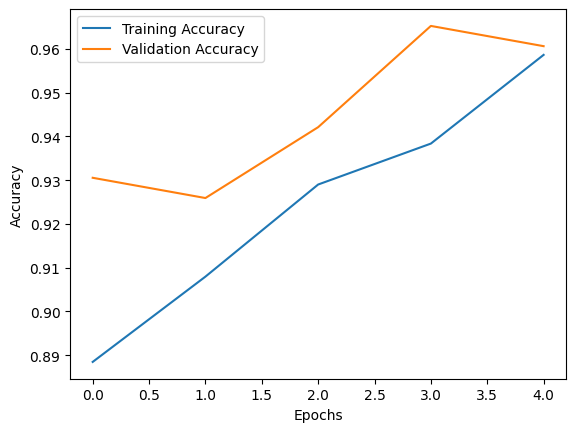

In [42]:
# Evaluasi model
score = model.evaluate(validation_generator, verbose=0)
print(f'Validation Loss: {score[0]}, Validation Accuracy: {score[1]}')

# Visualisasi training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Prediksi Gambar yang Diunggah

Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq.png


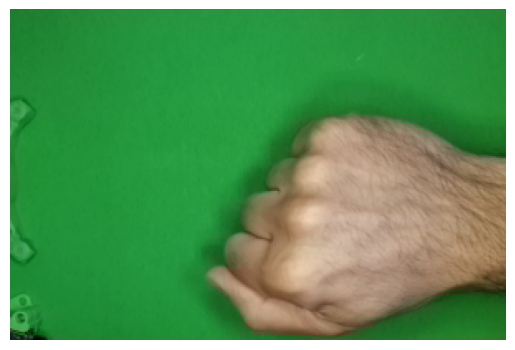

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 49ms/step
Predicted class: rock


In [47]:
# Import library yang diperlukan
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Upload gambar ke Colab
uploaded = files.upload()

# Menampilkan gambar yang diunggah
for filename in uploaded.keys():
    img_path = '/content/' + filename

    # Menampilkan gambar menggunakan matplotlib
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Pindahkan gambar ke Google Drive
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Ganti dengan nama file yang diunggah dan sesuaikan path
uploaded_filename = filename
destination_path = '/content/drive/My Drive/Colab Notebooks/rockpaperscissors/' + uploaded_filename

!mv "{img_path}" "{destination_path}"

# Path gambar yang telah dipindahkan ke Google Drive
uploaded_filename = filename
destination_path = '/content/drive/My Drive/Colab Notebooks/rockpaperscissors/' + uploaded_filename

# Memanggil fungsi untuk memprediksi gambar
predict_uploaded_image(destination_path)
